               0         1         2          3           4
0           0.00 -1.256673  2.876746   0.000000    0.000000
1           0.02 -1.145857  2.904938   0.000000    0.000000
2           0.04 -1.442611  2.958937   0.000000    0.000000
3           0.06 -1.408506  3.115770   0.000000    0.000000
4           0.08 -1.625154  2.966884   0.000000    0.000000
...          ...       ...       ...        ...         ...
499996   9999.92  0.797790  0.872162  82.358854  957.413911
499997   9999.94  0.827801  0.733508  85.456518  957.413911
499998   9999.96  0.779885  0.803583  83.757909  957.413911
499999   9999.98  0.832434  0.693568  86.310239  957.413911
500000  10000.00  0.724321  0.683139  85.616260  957.413911

[500001 rows x 5 columns]
1.6399404785213083
1.8085175499988166


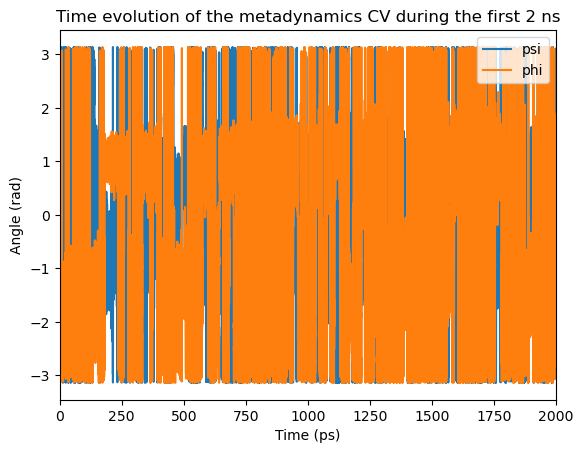

/state/partition1/job-26529130/ipykernel_1632987/1654849310.py:32: RuntimeWarning: divide by zero encountered in log
  H=-np.log(H)


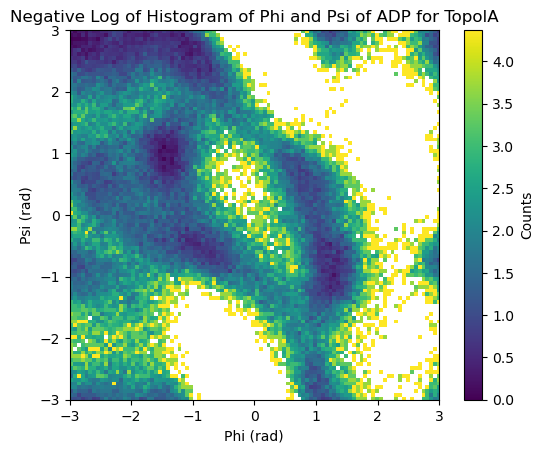

          0         1         2    3  4         5   6
0         1 -2.313841  2.273215  0.5  1  1.333333  10
1         2 -1.382194  0.645067  0.5  1  1.330000  10
2         3 -2.090592  0.809294  0.5  1  1.286379  10
3         4 -1.098446  1.172173  0.5  1  1.271144  10
4         5 -1.635879  2.706280  0.5  1  1.281736  10
...     ...       ...       ...  ... ..       ...  ..
9995   9996 -0.983129  0.577835  0.5  1  0.014677  10
9996   9997  2.402303  2.807062  0.5  1  0.109018  10
9997   9998  2.799939  2.741939  0.5  1  0.041705  10
9998   9999 -0.705591  2.526900  0.5  1  0.026090  10
9999  10000  0.724321  0.683139  0.5  1  0.029419  10

[10000 rows x 7 columns]


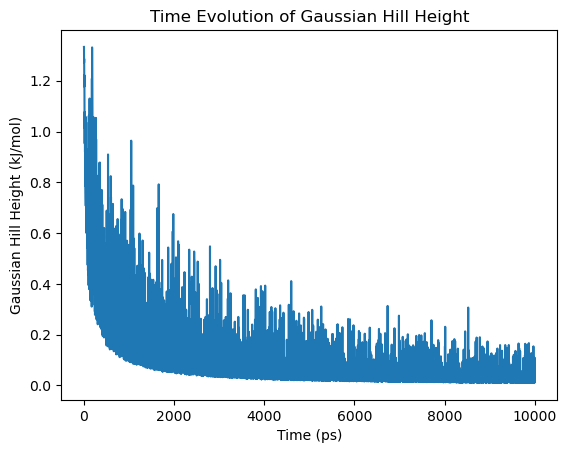

[[ -3.14159265  -3.14159265  95.24837733  46.15394236 -15.00415816]
 [ -3.04185955  -3.14159265  99.46218763  37.73256075 -15.92463129]
 [ -2.94212645  -3.14159265 102.7927529   28.4614228  -16.5872023 ]
 ...
 [  2.84239335   2.94524311  80.30394214  61.90615238  -3.74097313]
 [  2.94212645   2.94524311  86.39011493  59.7303984   -4.78974807]
 [  3.04185955   2.94524311  92.12802243  54.76232597  -5.80113874]]
[-3.14159265 -3.04185955 -2.94212645 ...  2.84239335  2.94212645
  3.04185955]


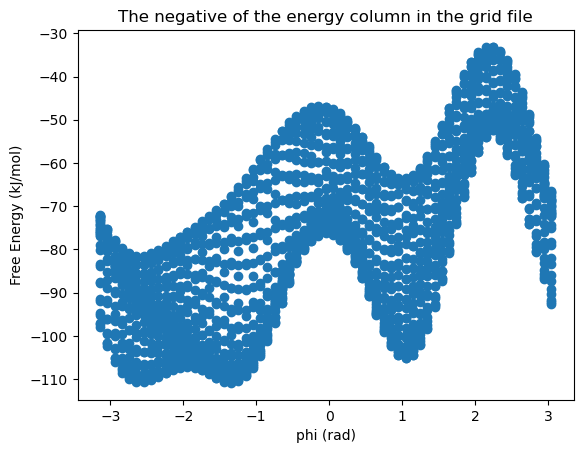

In [1]:
# this notebook is for plotting the end to end analysis and radius of gyration
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt

#load mdtraj
import mdtraj as md
import os

dataA = pd.read_csv('./COLVAR_A', header=None, delim_whitespace=True,skiprows=5)
A_phi_std = dataA[1].std()
print(dataA)
print(A_phi_std)
A_psi_std= dataA[2].std()
print(A_psi_std)

#plot
plt.plot(dataA[0][0:100001],dataA[2][0:100001],label="psi")
plt.plot(dataA[0][0:100001],dataA[1][0:100001],label="phi")
plt.legend(loc="upper right")
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
plt.title('Time evolution of the metadynamics CV during the first 2 ns')
plt.xlim([0,2000])
plt.savefig('Time evolution of the metadynamics CV during the first 2 ns.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

H, xedges, yedges = np.histogram2d(dataA[1][0:100001], dataA[2][0:100001], bins=100, normed=True)
H=H.T
H=-np.log(H)
H=H-H.min()
plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
plt.title('Negative Log of Histogram of Phi and Psi of ADP for TopolA')
plt.xlim([-3,3])
plt.ylim([-3,3])
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
# plt.savefig('Negative Log of Histogram of Phi and Psi of ADP for TopolA.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

hill_A = pd.read_csv('./HILLS_A', header=None, delim_whitespace=True,skiprows=7)
print(hill_A)
plt.plot(hill_A[0],hill_A[5])
plt.xlabel('Time (ps)')
plt.ylabel('Gaussian Hill Height (kJ/mol)')
plt.title('Time Evolution of Gaussian Hill Height')
plt.savefig('Time Evolution of Gaussian Hill Height.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

grid_A=np.loadtxt("topolA.grid.dat",skiprows=5)
print(grid_A)
print(grid_A[:,0])
plt.scatter(grid_A[:,0],-1*grid_A[:,2])
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('The negative of the energy column in the grid file')
plt.show()

phi_new: [-3.14159265 -2.96705973 -2.7925268  -2.61799388 -2.44346095 -2.26892803
 -2.0943951  -1.91986218 -1.74532925 -1.57079633 -1.3962634  -1.22173048
 -1.04719755 -0.87266463 -0.6981317  -0.52359878 -0.34906585 -0.17453293
  0.          0.17453293  0.34906585  0.52359878  0.6981317   0.87266463
  1.04719755  1.22173048  1.3962634   1.57079633  1.74532925  1.91986218
  2.0943951   2.26892803  2.44346095  2.61799388  2.7925268   2.96705973]
shape pf phi_new: (36,)
2.967059728
psi_new: [-3.14159265 -2.7925268  -2.44346095 -2.0943951  -1.74532925 -1.3962634
 -1.04719755 -0.6981317  -0.34906585  0.          0.34906585  0.6981317
  1.04719755  1.3962634   1.74532925  2.0943951   2.44346095  2.7925268 ]
shape pf psi_new: (18,)
shape pf fe_new: (18, 36)


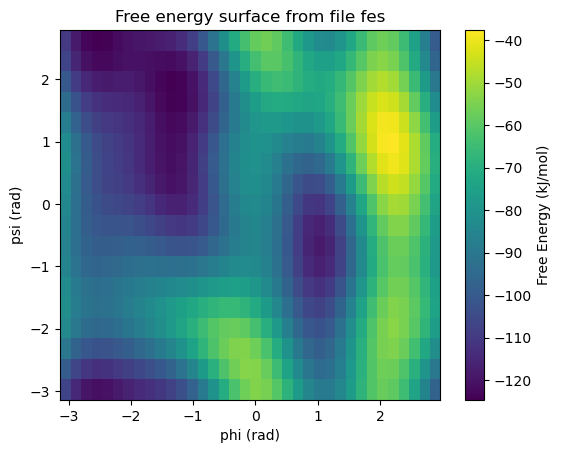

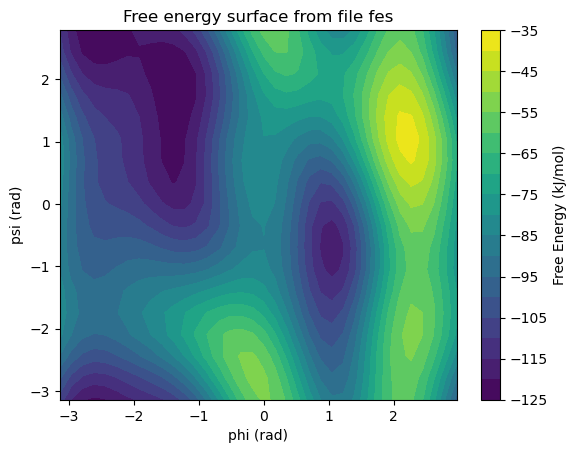

In [19]:
fes=np.loadtxt("fes.dat",skiprows=9)

phi=fes[:,0]
phi_new=phi[:36]
print('phi_new:',phi_new)
print('shape pf phi_new:',phi_new.shape)
print(phi_new[-1])


psi=fes[:,1]
psi_new=psi[::36]
print('psi_new:',psi_new)
print('shape pf psi_new:',psi_new.shape)

fe=fes[:,2]
fe_new=fe.reshape(18,36)
print('shape pf fe_new:',fe_new.shape)

plt.imshow(fe_new,origin='lower',extent=[phi_new[0],phi_new[-1],psi_new[0],psi_new[-1]])
plt.xlabel('phi (rad)')
plt.ylabel('psi (rad)')
plt.title('Free energy surface from file fes')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Free Energy (kJ/mol)')
plt.show()

plt.contourf(phi_new,psi_new,fe_new,20)
plt.xlabel('phi (rad)')
plt.ylabel('psi (rad)')
plt.title('Free energy surface from file fes')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Free Energy (kJ/mol)')
plt.show()

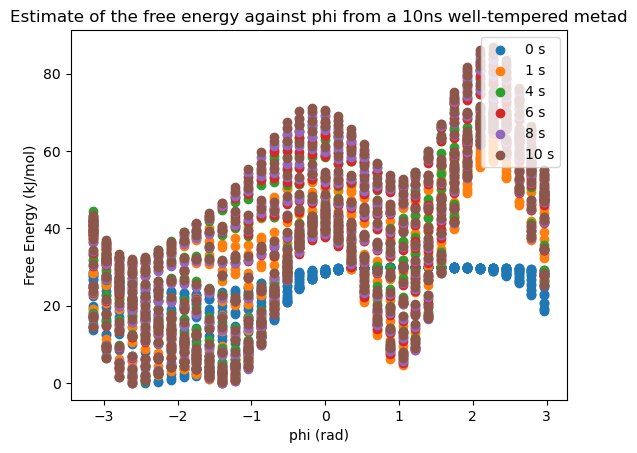

In [12]:
fes0=np.loadtxt("fes_0.dat",skiprows=9)
fes10=np.loadtxt("fes_10.dat",skiprows=9)
fes40=np.loadtxt("fes_40.dat",skiprows=9)
fes60=np.loadtxt("fes_60.dat",skiprows=9)
fes80=np.loadtxt("fes_80.dat",skiprows=9)
fes100=np.loadtxt("fes_100.dat",skiprows=9)
plt.scatter(fes0[:,0],fes0[:,2],label="0 s")
plt.scatter(fes10[:,0],fes10[:,2],label="1 s")
plt.scatter(fes40[:,0],fes40[:,2],label="4 s")
plt.scatter(fes60[:,0],fes60[:,2],label="6 s")
plt.scatter(fes80[:,0],fes80[:,2],label="8 s")
plt.scatter(fes100[:,0],fes100[:,2],label="10 s")
plt.legend(loc="upper right")
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Estimate of the free energy against phi from a 10ns well-tempered metad')
plt.show()